In [2]:
import os
from pathlib import Path
import numpy as np, pandas as pd, scanpy as sc, loompy as lp, anndata as ad

In [14]:
from pyscenic.plotting import plot_binarization

In [10]:
# set working directory
wdir = '.'
os.chdir( wdir )

PATH_TO_AUC_MTX = Path("../data/scenic_protocol/files/auc_mtx.csv")
PATH_TO_BIN_MTX = Path("../data/scenic_protocol/files/bin_mtx.csv")
PATH_TO_THRESHOLD = Path("../data/scenic_protocol/files/thresholds.csv")

HPCS_META = Path("../data/processed/hpcs_lps_metadata.csv")

In [12]:
auc_mtx = pd.read_csv(PATH_TO_AUC_MTX, index_col=0)
bin_mtx = pd.read_csv(PATH_TO_BIN_MTX, index_col=0)
thresholds = pd.read_csv(PATH_TO_THRESHOLD, index_col=0).threshold

In [13]:
auc_mtx

,AU041133(+),Alx3(+),Arid3a(+),Arntl(+),Arx(+),Ascl1(+),Ascl2(+),Atf2(+),Atf3(+),Atf4(+),...,Zfp524(+),Zfp612(+),Zfp64(+),Zfp768(+),Zfp950(+),Zic1(+),Zic3(+),Zmiz1(+),Zscan29(+),Zscan4d(+)
TCTTCACA_YT013101,0.002828,0.000000,0.029238,0.058443,0.00000,0.094453,0.007912,0.074696,0.057883,0.096997,...,0.0,0.201004,0.000000,0.000000,0.068090,0.037791,0.000000,0.063419,0.000000,0.000000
GATAGACA_YT013101,0.001554,0.000000,0.135437,0.072429,0.00000,0.104965,0.004264,0.071206,0.068060,0.104071,...,0.0,0.205147,0.000000,0.056051,0.082790,0.038653,0.000000,0.073836,0.000000,0.000000
GCCACATA_YT013101,0.000000,0.000000,0.048518,0.052333,0.00000,0.111385,0.026307,0.069848,0.056209,0.095727,...,0.0,0.090264,0.000000,0.000000,0.057014,0.000000,0.000000,0.049439,0.000000,0.000000
TCCGTCTA_YT013101,0.011233,0.000000,0.037763,0.055983,0.00000,0.078916,0.026988,0.062209,0.047191,0.094416,...,0.0,0.000000,0.000000,0.000000,0.050182,0.003449,0.000000,0.058656,0.000000,0.100276
TAGGATGA_YT013101,0.000000,0.000000,0.000000,0.047681,0.00000,0.101426,0.009209,0.046435,0.047252,0.084204,...,0.0,0.124044,0.000000,0.002514,0.032855,0.000000,0.000000,0.057329,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCTTCACA_YT19070315,0.023104,0.046597,0.064372,0.042245,0.00000,0.073522,0.000176,0.039816,0.045768,0.075777,...,0.0,0.083254,0.000000,0.039055,0.033240,0.000000,0.022137,0.050095,0.017208,0.000000
TGGAACAA_YT19070315,0.010277,0.000000,0.068754,0.024794,0.00000,0.042511,0.023999,0.052298,0.055739,0.106177,...,0.0,0.000000,0.000000,0.028079,0.047257,0.000000,0.000000,0.037736,0.000000,0.000000
TGGCTTCA_YT19070315,0.000000,0.000000,0.000000,0.058560,0.00000,0.045894,0.008527,0.065940,0.058742,0.119265,...,0.0,0.045570,0.000000,0.000000,0.060112,0.000000,0.000000,0.036447,0.000000,0.000000
TGGTGGTA_YT19070315,0.000000,0.000000,0.000000,0.041814,0.00000,0.079939,0.027560,0.055747,0.054530,0.088029,...,0.0,0.000000,0.123773,0.000000,0.037025,0.000000,0.000000,0.041194,0.000000,0.000000


In [9]:
thresholds

AU041133(+)    0.029493
Alx3(+)        0.034806
Arid3a(+)      0.035319
Arntl(+)       0.090597
Arx(+)         0.026210
                 ...   
Zic1(+)        0.017173
Zic3(+)        0.008081
Zmiz1(+)       0.069248
Zscan29(+)     0.037140
Zscan4d(+)     0.085636
Name: threshold, Length: 356, dtype: float64

/home/luolab/miniconda3/envs/scenic_protocol/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


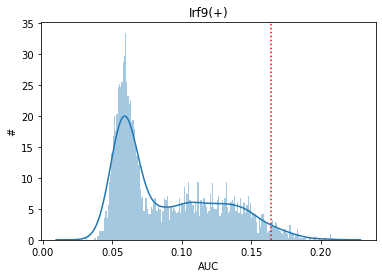

In [18]:
plot_binarization(auc_mtx, "Irf9(+)", thresholds['Irf9(+)'])